In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
url = 'https://drive.google.com/file/d/1VfCaU5vFVWsSYrvKQF2x9iS6I7KoWEVH/view'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df.shape

(11275, 5)

In [2]:
df.columns

Index(['ss_username', 'cf_username', 'cf_rating', 'cc_username', 'cc_rating'], dtype='object')

In [7]:
y = df['cf_rating']
x = df['cc_rating']
print('Length of cc :',len(x),'Length of cf :',len(y))
x = x.dropna()
y = y.dropna()
print("after removing nan length of cc is :",len(x),"after removing nan the length of cf is:",len(y))

Length of cc : 11275 Length of cf : 11275
after removing nan length of cc is : 10280 after removing nan the length of cf is: 7437


## We are taking people only those who have both CF and CC ratings

In [8]:
df_1=df.dropna()
print(df_1.shape)
y = df_1['cf_rating']
x = df_1['cc_rating']

(6442, 5)


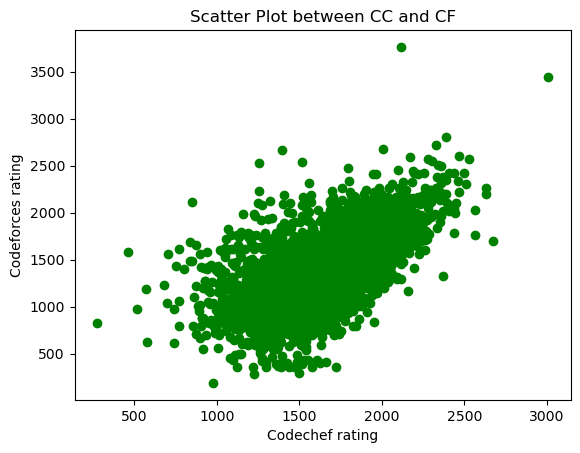

In [9]:
plt.scatter(x,y,color='green')
plt.title("Scatter Plot between CC and CF")
plt.xlabel('Codechef rating')
plt.ylabel('Codeforces rating')
plt.show()

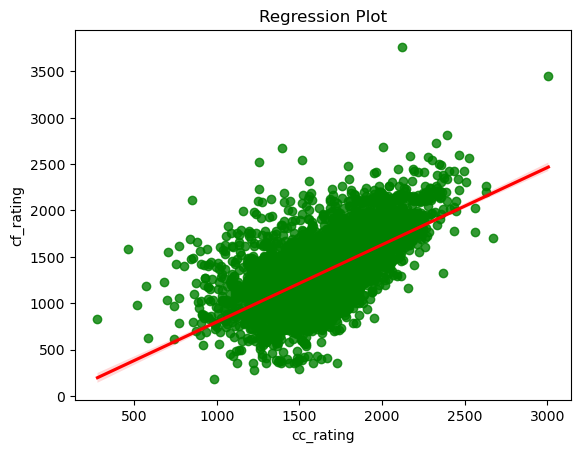

In [11]:
sns.regplot(x=x,y=y,scatter_kws = {"color":"green"},line_kws={"color":"red"})
plt.title('Regression Plot')
plt.show()

Estimated coefficients:
Constant b_0 =  -32.62926507315615
Slope of graph b_1 =  0.8315620555789324


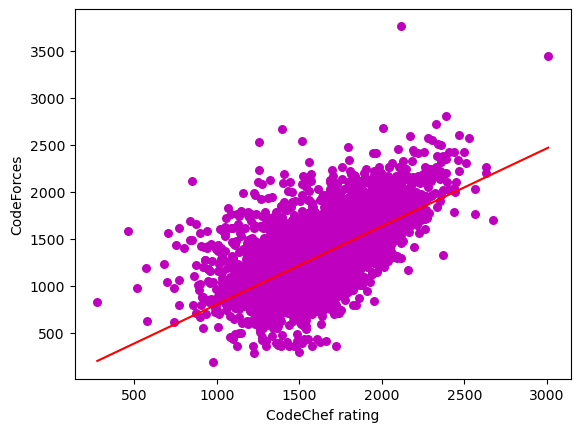

In [15]:
import numpy as np 
import matplotlib.pyplot as plt
def estimate_coef(x,y):
    # no of observations/points
    n = np.size(x)
    # mean x and y 
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*mean_y*mean_x
    SS_xx = np.sum(x*x) - n*mean_x*mean_x
    # calculating regression coefficients
    b_1 = SS_xy/SS_xx
    b_0 = mean_y-b_1*mean_x
    return (b_0,b_1)
def plot_regression_line(x,y,b):
    plt.scatter(x,y,color="m",marker="o",s=30)
    # Plotting the linear Regression line with predicted response vector
    y_pred = b[0]+b[1]*x
    plt.plot(x,y_pred,color="r")
    plt.xlabel('CodeChef rating')
    plt.ylabel('CodeForces')
    plt.show()
b = estimate_coef(x,y)
print("Estimated coefficients:")
print("Constant b_0 = ",b[0])
print("Slope of graph b_1 = ",b[1])
# plotting the regression line
plot_regression_line(x,y,b)

In [17]:
b_0 = -32.62926507315615
b_1 = 0.8315620555789324
def fun(codechef_rating):
    codeforces_rating = (codechef_rating*b_1)+b_0
    return codeforces_rating
for z in range(1000,2100,100):
    print("Codechef Rating:",z,"Codeforces Rating:",round(fun(z),2))

Codechef Rating: 1000 Codeforces Rating: 798.93
Codechef Rating: 1100 Codeforces Rating: 882.09
Codechef Rating: 1200 Codeforces Rating: 965.25
Codechef Rating: 1300 Codeforces Rating: 1048.4
Codechef Rating: 1400 Codeforces Rating: 1131.56
Codechef Rating: 1500 Codeforces Rating: 1214.71
Codechef Rating: 1600 Codeforces Rating: 1297.87
Codechef Rating: 1700 Codeforces Rating: 1381.03
Codechef Rating: 1800 Codeforces Rating: 1464.18
Codechef Rating: 1900 Codeforces Rating: 1547.34
Codechef Rating: 2000 Codeforces Rating: 1630.49
